In [5]:
# Part 1: Data Loading and Basic Exploration
# Load the dataset using pandas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_excel('flight_price.xlsx')

In [8]:
# Display the first 5 and last 5 rows.

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
# Check for null/missing values and handle them appropriately.

df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [11]:
# Handling missing values
df = df.dropna()

In [12]:
# Double check for any missing values

print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [13]:
# Display basic information and summary statistics of the dataset.

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
# Part 2: Data Cleaning and Preprocessing
# Convert Date_of_Journey, Dep_Time, and Arrival_Time to datetime formats

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

/tmp/ipython-input-258791277.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
/tmp/ipython-input-258791277.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
/tmp/ipython-input-258791277.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [15]:
# Extract features such as: Journey day and month, Hour and minute from departure and arrival times.

df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [16]:
# Convert Duration into minutes (or hours).

def convert_duration(x):
    if 'h' in x and 'm' in x:
        h, m = x.split('h')
        return int(h.strip())*60 + int(m.replace('m','').strip())
    elif 'h' in x:
        return int(x.replace('h','').strip())*60
    elif 'm' in x:
        return int(x.replace('m','').strip())
    else:
        return 0

df['Duration_Minutes'] = df['Duration'].apply(convert_duration)

In [17]:
# Encode categorical features using suitable encoding techniques.
# To make it simple, we use Label Encoding for small number of categories.

from sklearn.preprocessing import LabelEncoder

for col in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [18]:
# Handle anomalies or inconsistencies in Total_Stops, Additional_Info, and Route.

df['Route'].unique()
df['Total_Stops'].unique()
df['Additional_Info'].unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

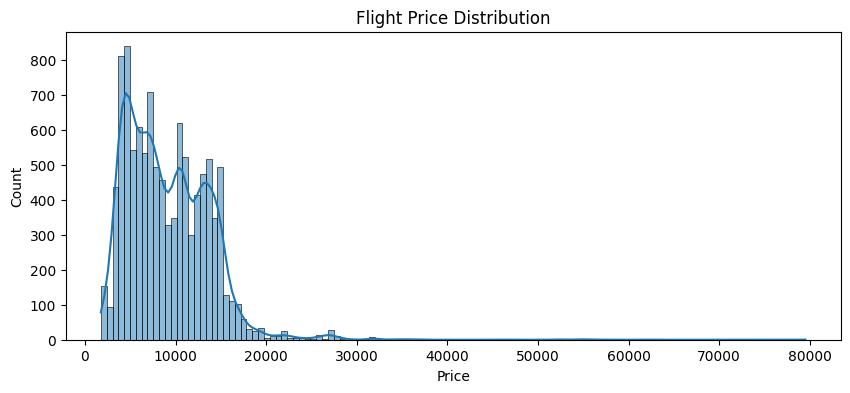

In [19]:
# Part 3: Univariate Analysis
# Visualize the distribution of: Prices

plt.figure(figsize=(10,4))
sns.histplot(df['Price'], kde=True)
plt.title('Flight Price Distribution')
plt.show()


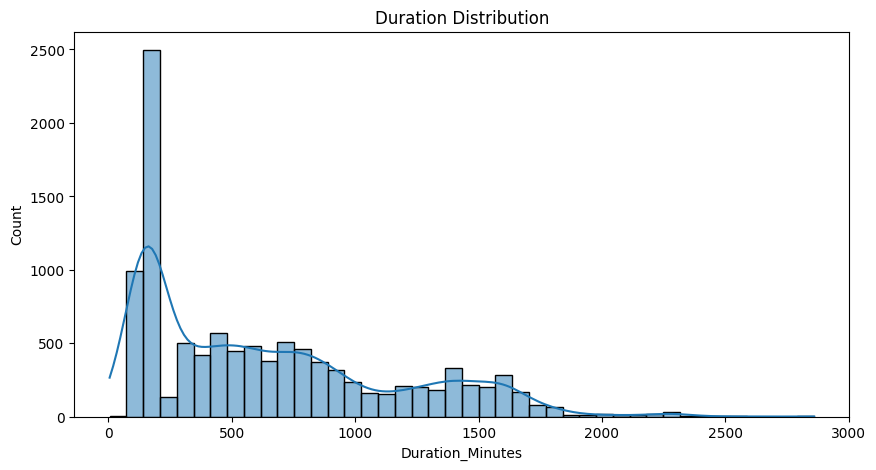

In [20]:
# The duration distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Duration_Minutes'], kde=True)
plt.title('Duration Distribution')
plt.show()

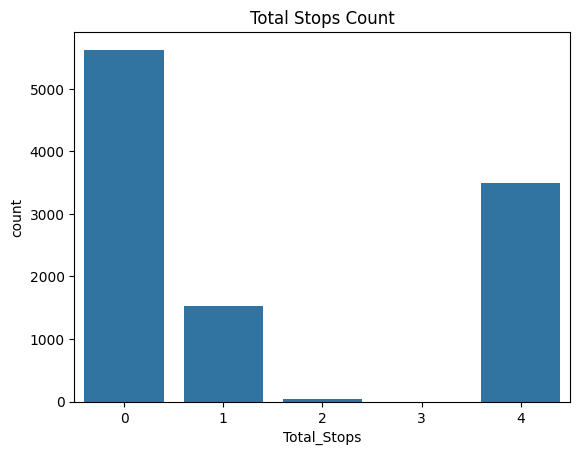

In [21]:
# Total stops

sns.countplot(x='Total_Stops', data=df)
plt.title('Total Stops Count')
plt.show()

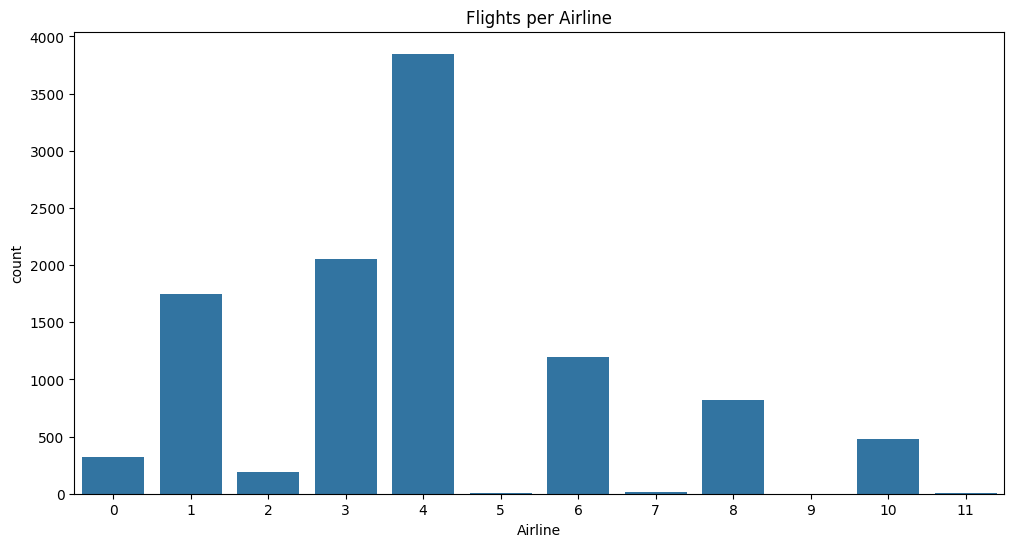

In [22]:
# Count plot of flights per Airline

plt.figure(figsize=(12,6))
sns.countplot(x='Airline', data=df, color='red')
sns.countplot(x='Airline', data=df)
plt.title('Flights per Airline')
plt.show()

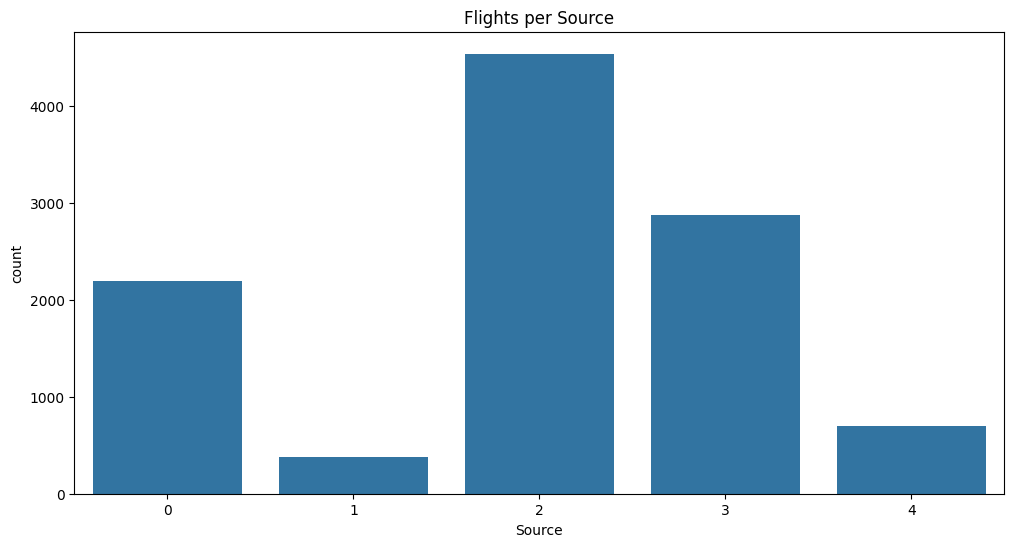

In [23]:
# Count plot for Source

plt.figure(figsize=(12,6))
sns.countplot(x='Source', data=df)
plt.title('Flights per Source')
plt.show()


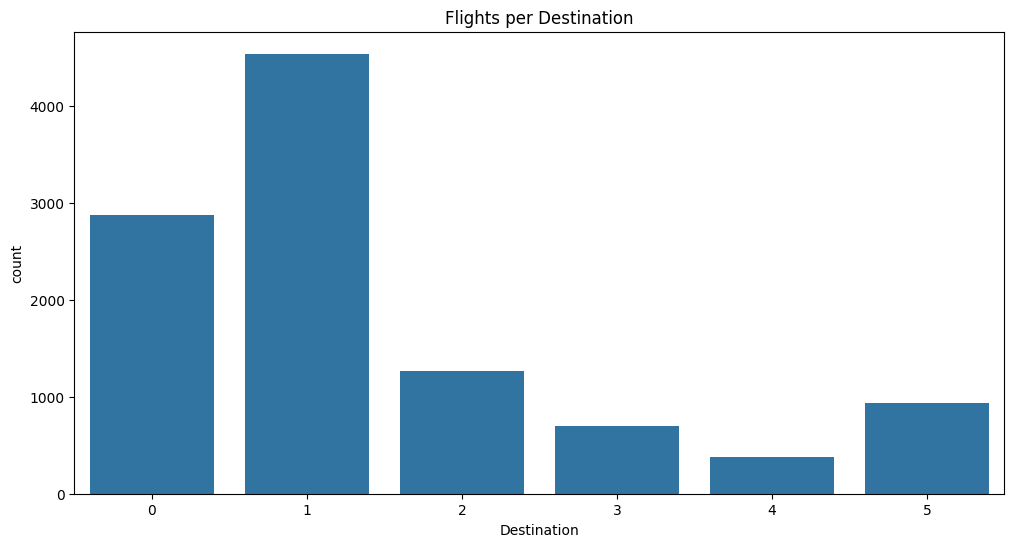

In [24]:
# Count plot for Destination

plt.figure(figsize=(12,6))
sns.countplot(x='Destination', data=df)
plt.title('Flights per Destination')
plt.show()


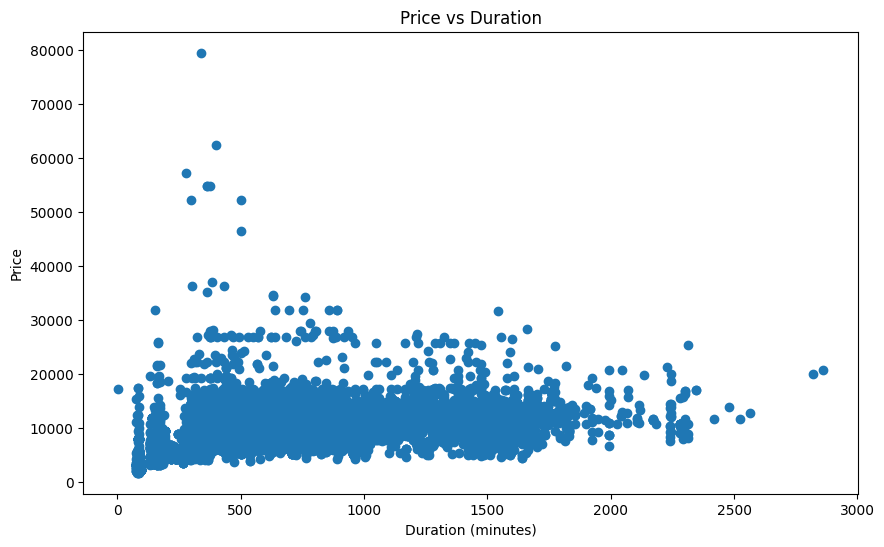

In [25]:
# Part 4: Bivariate & Multivariate Analysis
# Plot Price vs. other numerical features (Price vs Duration)

plt.figure(figsize=(10,6))
plt.scatter(df['Duration_Minutes'], df['Price'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Price vs Duration')
plt.show()




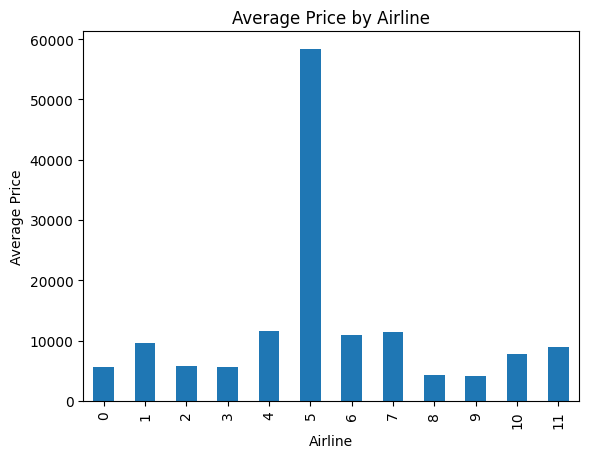

In [26]:
# The Average Flight Price by Airline

df.groupby('Airline')['Price'].mean().plot(kind='bar')
plt.title('Average Price by Airline')
plt.ylabel('Average Price')
plt.show()

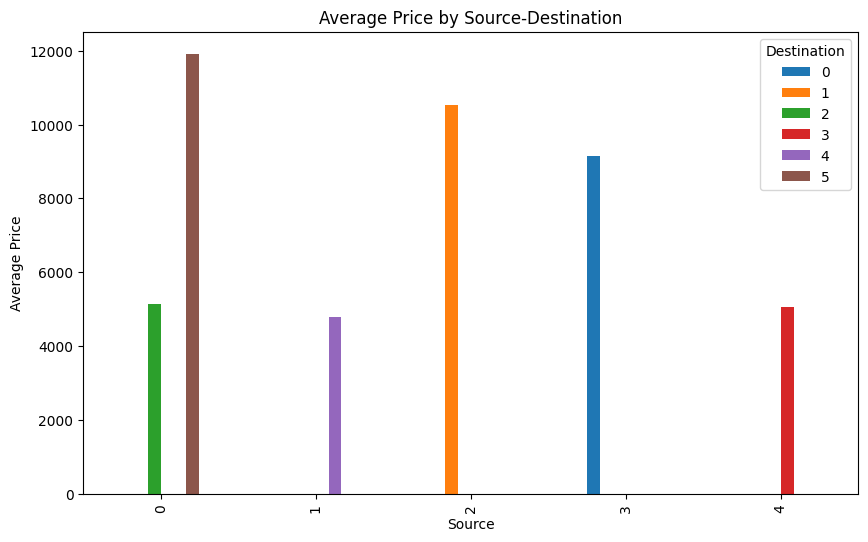

In [27]:
# The Average Price by Source-Destination Pair

df.groupby(['Source', 'Destination'])['Price'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Average Price by Source-Destination')
plt.ylabel('Average Price')
plt.show()

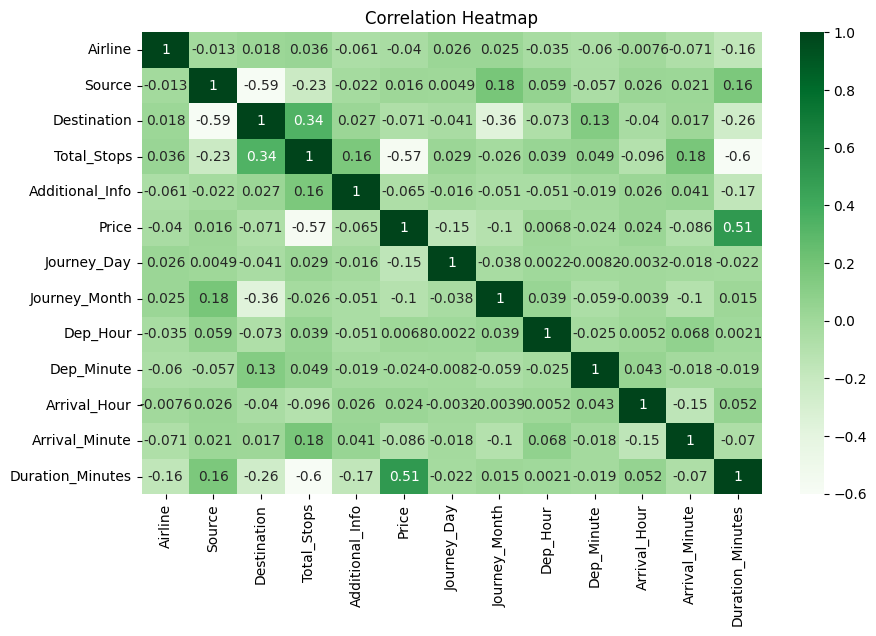

In [28]:
# Correlation heatmap for numeric features

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot  the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Part 5: Feature Engineering (Bonus)
# Create new features like: Time of day, Weekday vs Weekend travel, Is_Rush_Hour.

df['Time_of_Day'] = pd.cut(df['Dep_Hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
df['Weekday'] = df['Date_of_Journey'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >=5 else 0)
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

/tmp/ipython-input-2952478592.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Time_of_Day')['Price'].mean().plot(kind='bar')


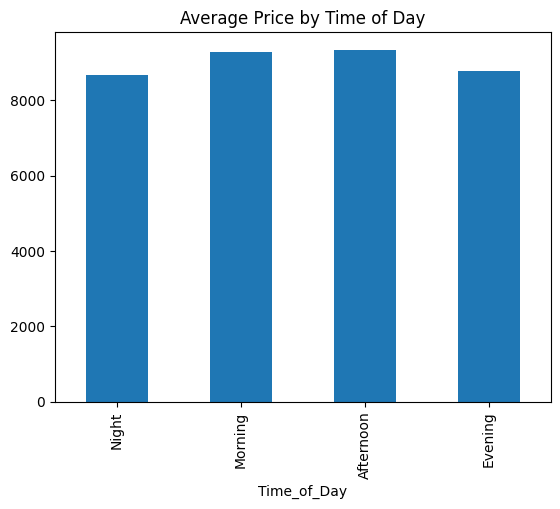

In [30]:
# Explore how these features relate to price.

df.groupby('Time_of_Day')['Price'].mean().plot(kind='bar')
plt.title('Average Price by Time of Day')
plt.show()

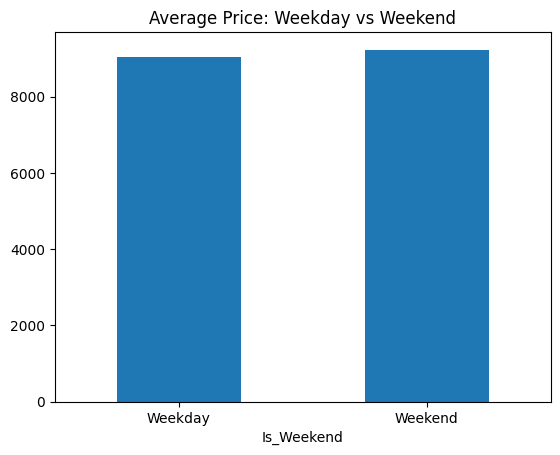

In [31]:
df.groupby('Is_Weekend')['Price'].mean().plot(kind='bar')
plt.title('Average Price: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.show()

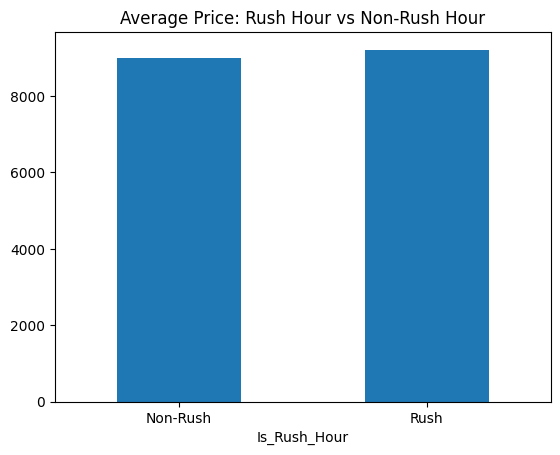

In [32]:
df.groupby('Is_Rush_Hour')['Price'].mean().plot(kind='bar')
plt.title('Average Price: Rush Hour vs Non-Rush Hour')
plt.xticks([0, 1], ['Non-Rush', 'Rush'], rotation=0)
plt.show()

Part 6: Insights & Reporting

**1. List the top 5 insights derived from the analysis**

1. Flights with more stops tend to have lower prices.
2. Certain airlines consistently offer higher (or lower) prices.
3. Flights during rush hours are generally more expensive.
4. Weekend flights cost more on average than weekday flights.
5. Longer duration flights are typically more expensive, but there are exceptions for airlines or routes.


**2. Discuss potential factors influencing flight prices.**

**Airline:**
Different airlines have varying pricing strategies, with premium airlines usually charging more than budget carriers.


**Number of Stops:**
Non-stop flights tend to be more expensive than flights with one or more stops.


**Route and Distance:**
Longer or less common routes generally result in higher ticket prices.


**Departure Time:**
Flights departing during peak hours, such as early mornings or evenings, are often priced higher due to higher demand.


**Booking Timing:**
Tickets purchased closer to the departure date are usually more expensive than those booked in advance.


**Travel Season:**
Prices typically rise during holiday seasons, weekends, or special events due to increased demand.


**Day of the Week:**
Flights on weekends or Mondays/Fridays are often costlier than those on midweek days.

**3. Provide suggestions for travelers based on your findings**

**Book Early:**
Flight prices are usually lower when you book several weeks or months in advance.

**Travel on Weekdays:**
Flights departing on Tuesdays or Wednesdays often cost less than those on weekends.

**Choose Flights with Stops:**
Flights with one or more stops can be cheaper than non-stop flights, though they may take longer.

**Avoid Peak Travel Times:**
Flying during off-peak hours or outside of holidays and rush hours can help you save money.

**Compare Different Airlines:**
Check prices across multiple airlines, as some budget carriers may offer lower fares for the same route.

**Be Flexible with Dates and Times:**
If you are open to changing your travel date or time, you can often find better deals.

**Check for Discounts and Offers:**
Look out for special promotions or discounts on airline or travel websites.

**Limit Extra Services:**
Avoid adding extras like checked baggage or seat selection if you want to keep costs low.